In [1]:
# Import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("real_images.csv")

# Combined image

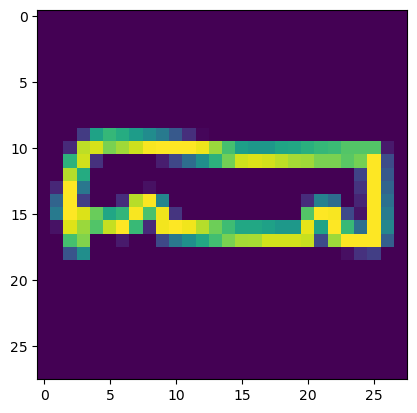

In [3]:
image = df.iloc[0].to_numpy().reshape((28, 28))
plt.imshow(image, interpolation='nearest')
plt.show()

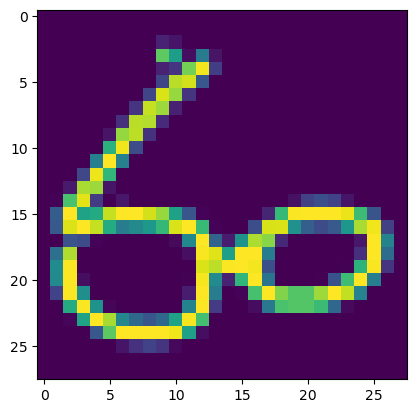

In [4]:
image = df.iloc[1].to_numpy().reshape((28, 28))
plt.imshow(image, interpolation='nearest')
plt.show()

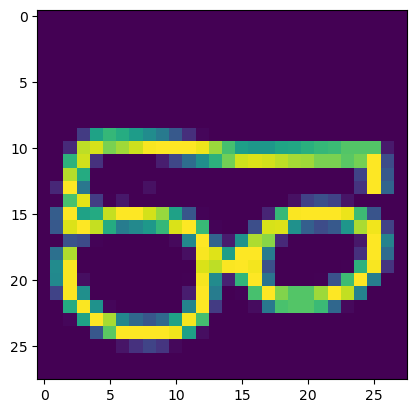

In [5]:
combined = np.concatenate([df.iloc[0].values[:392], df.iloc[1].values[392:]])
image = combined.reshape((28, 28))
plt.imshow(image, interpolation='nearest')
plt.show()

# Better random image

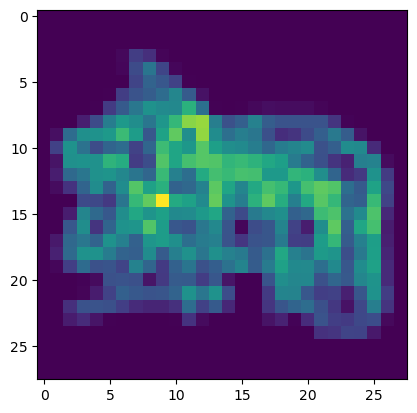

In [6]:
image = df[2:6].mean().to_numpy().reshape((28, 28))
plt.imshow(image, interpolation='nearest')
plt.show()

In [7]:
import random
def mutate(image):
    index_x = np.random.randint(9, 20)
    x_size = index_x + np.random.randint(2, 8)
    index_y = np.random.randint(5, 22)
    y_size = index_y + np.random.randint(2, 8)
    image[index_x: x_size, index_y: y_size] = 0
    return image

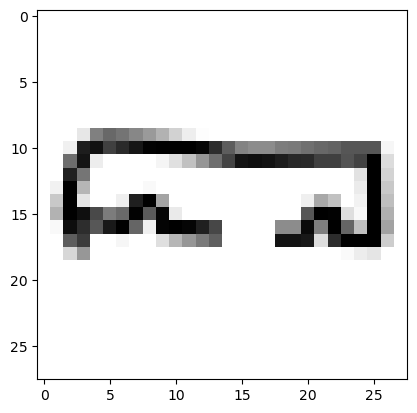

In [8]:
image = df.iloc[0].values / 255
image = image.reshape((28, 28))
image = mutate(image)
plt.imshow(image, cmap = 'Greys')
plt.show()

In [35]:
#randomly created fake images
def _create_random():
    random_images = []
    for _ in range(5000):
        image_random = np.random.randint(0, 256, size=784) / 255
        image_random = image_random.reshape((28, 28))
        random_images.append(image_random)
    return np.array(random_images)

In [14]:
image_fake = pd.read_csv("fake_images.csv")
real_images = pd.read_csv("real_images.csv")

In [45]:
# create fake images from fake or real by mutating a bit pixes
def _form_fake_image(image):
    images_fake = []
    for i in range(len(image)):
        image = df.iloc[i].values/255
        image = image.reshape((28, 28))
        index_x = np.random.randint(9, 20)
        x_size = index_x + np.random.randint(2, 5)
        index_y = np.random.randint(5, 22)
        y_size = index_y + np.random.randint(2, 5)
        image[index_x: x_size, index_y: y_size] = 0
        images_fake.append(image)
    return np.array(images_fake)

In [46]:
data_from_fake = _form_fake_image(image_fake[:int(len(image_fake)*0.3)]) #30 percent
data_from_real = _form_fake_image(real_images[:int(len(image_fake)*0.5)]) # 50 percent
data_from_random = _create_random() # 20 percent
print(data_from_fake.shape, data_from_real.shape, data_from_random.shape)
# data_from_fake = pd.DataFrame(data_from_fake)
dataset1 = np.concatenate([data_from_fake, data_from_real])
images = np.concatenate([dataset1, data_from_random])
images

(7500, 28, 28) (12500, 28, 28) (5000, 28, 28)


array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [44]:
images.shape

(25000, 28, 28)

In [ ]:
data_from_fake = _form_fake_image(image_fake*0.3) #30 percent
data_from_fake

In [ ]:
data_from_fake = pd.DataFrame(data_from_fake)
data_from_fake.shape

In [ ]:
def _mutate(self, offspring):
    index_x = np.random.randint(9, 20)
    x_size = index_x + np.random.randint(2, 8)
    index_y = np.random.randint(5, 22)
    y_size = index_y + np.random.randint(2, 8)
    offspring[index_x: x_size, index_y: y_size] = 0
    return offspring